### Introduction

In the following notebook, I will be cleaning a raw data file of listings data from Inside Airbnb

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to data on local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\01_Raw\SF Airbnb'

#Read in data
df = pd.read_csv(path + '/2020_0519_Aggregated_Listings.csv',parse_dates= ['host_since','last_review', 'first_review'],index_col=0,
                dtype = {'review_scores_accuracy':'category','review_scores_checkin':'category',
                          'review_scores_cleanliness':'category','review_scores_communication':'category',
                          'review_scores_rating':'category','review_scores_location':'category', 'review_scores_value':'category',
                         'zipcode':'object'}
                )

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (113994, 106)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,medium_url,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,number_of_reviews_ltm,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,1,0,0,2020-04-08,3 weeks ago,moderate,San Francisco,$100.00,United States,US,New update: the house next door is under const...,none,$25.00,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,98%,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/user/efdad...,90%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/user/efdad...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,t,A family of 4 lives upstairs with their dog. N...,f,t,"{""SAN FRANCISCO""}",2020-03-13,2020-04-08,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,1125,1,1125,1125.0,NaN,1125,1,1,1.0,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Lower Haight,Western Addition,NaN,Due to the fact that we have children and a do...,240,56,https://a0.muscache.com/im/pictures/b7c2a199-4...,$170.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home/apt,20200407152614,$100.00,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
1,"Our deck, garden, gourmet kitchen and extensiv...",5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,1,0,0,2020-04-09,2 weeks ago,strict_14_with_grace_period,San Francisco,$100.00,United States,US,We live in a large Victorian house on a quiet ...,none,$0.00,2009-05-03,2,t,Philip: English transplant to the Bay Area and...,81%,t,8904,t,f,2.0,"San Francisco, California, United States",Philip And Tania,Bernal Heights,https://a0.muscache.com/im/users/8904/profile_...,100%,within a day,2009-03-02,https://a0.muscache.com/im/users/8904/profile_...,2.0,https://www.airbnb.com/users/show/8904,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Please respect the house, the art work, the fu...",5858,f,NaN,f,t,"{""SAN 

**View data description**

In [5]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,113994.0,3.149376e+00,1.909372e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
availability_30,113994.0,1.052719e+01,1.152965e+01,0.000000e+00,0.000000e+00,5.000000e+00,2.200000e+01,3.000000e+01
availability_365,113994.0,1.563405e+02,1.326936e+02,0.000000e+00,2.700000e+01,1.290000e+02,2.910000e+02,3.650000e+02
availability_60,113994.0,2.457436e+01,2.278379e+01,0.000000e+00,0.000000e+00,2.000000e+01,4.700000e+01,6.000000e+01
availability_90,113994.0,4.047330e+01,3.394188e+01,0.000000e+00,3.000000e+00,3.800000e+01,7.300000e+01,9.000000e+01
bathrooms,113854.0,1.389064e+00,9.092488e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00,1.400000e+01
bedrooms,113948.0,1.340103e+00,9.356491e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
beds,113746.0,1.739991e+00,1.190063e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
calculated_host_listings_count,113994.0,2.513188e+01,6.085340e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+01,3.010000e+02
calculated_host_listings_count_entire_homes,113994.0,2.056674e+01,5.867199e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.010000e+02


## Data Cleaning

### Drop Columns

**Drop mostly homogenous/redundant columns and columns with only missing values**

In [6]:
#Extract cols with values with more than 1 unique value
df = df.loc[:,(df.nunique() != 1)]

In [7]:
#Drop missing columns
df.dropna(axis =1,how = 'all', inplace = True)

#Drop redundant columns
df.drop(['jurisdiction_names', 'market','state','neighbourhood','street','smart_location','host_neighbourhood'], axis = 1, inplace = True)

In [8]:
#Inspect cols with <=2 unique values
inspect = df.loc[:, (df.nunique() <=2)].columns.to_list()

#Check
display(df[inspect].head(3))

,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license
0,t,t,t,t,t,f,f,t
1,t,t,f,f,t,f,f,t
2,t,t,f,f,t,f,f,t


In [9]:
#Create dictionary for mapping
mapping = {'t':1,'f':0}

#Map 1's and 0's on t's and f's
df[inspect] = df[inspect].apply(lambda x: x.map(mapping, na_action='ignore'))

#Check
display(df[inspect].head(3))

,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license
0,1.0,1.0,1.0,1,1,0,0,1
1,1.0,1.0,0.0,0,1,0,0,1
2,1.0,1.0,0.0,0,1,0,0,1


**Drop columns containing url data or pertain to webscraping**

In [10]:
#Subset column headers containing 'url' or 'scrape' and store in drop
drop = list(df.filter(regex='url|scrape').columns)

#Drop drop list and check
df.drop(columns= df[drop], inplace=True)
df.head(1)

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_response_rate,host_response_time,host_since,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,square_feet,summary,transit,weekly_price,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,1,0,0,3 weeks ago,moderate,San Francisco,$100.00,New update: the house next door is under const...,$25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,98%,1.0,1169,1.0,1.0,1.0,"San Francisco, California, United States",Holly,90%,within an hour,2008-07-31,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,1,A family of 4 lives upstairs with their dog. N...,1,2020-03-13,37.76931,STR-0001256,-122.43386,1125,1,1125,1125.0,1125,1,1,1.0,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,240,56,$170.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home/apt,$100.00,"Newly remodeled, modern, and bright garden uni...",NaN,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",94117


## Check for high correlations between features

**Prepare data**

In [11]:
#Create correlation matrix and capture absolute values of correlations
c = df.corr().abs()

#Create a df that stores correlations between features >.9
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['feat1','feat2','corr']
so = so.loc[ (so.feat1 != so.feat2 )& (so['corr'] > .9)]

#Capture list of features
feats =so.feat1.unique()

#Subset df by cols in feats and create corr
corr= df[feats].corr()

**Create heatmap**

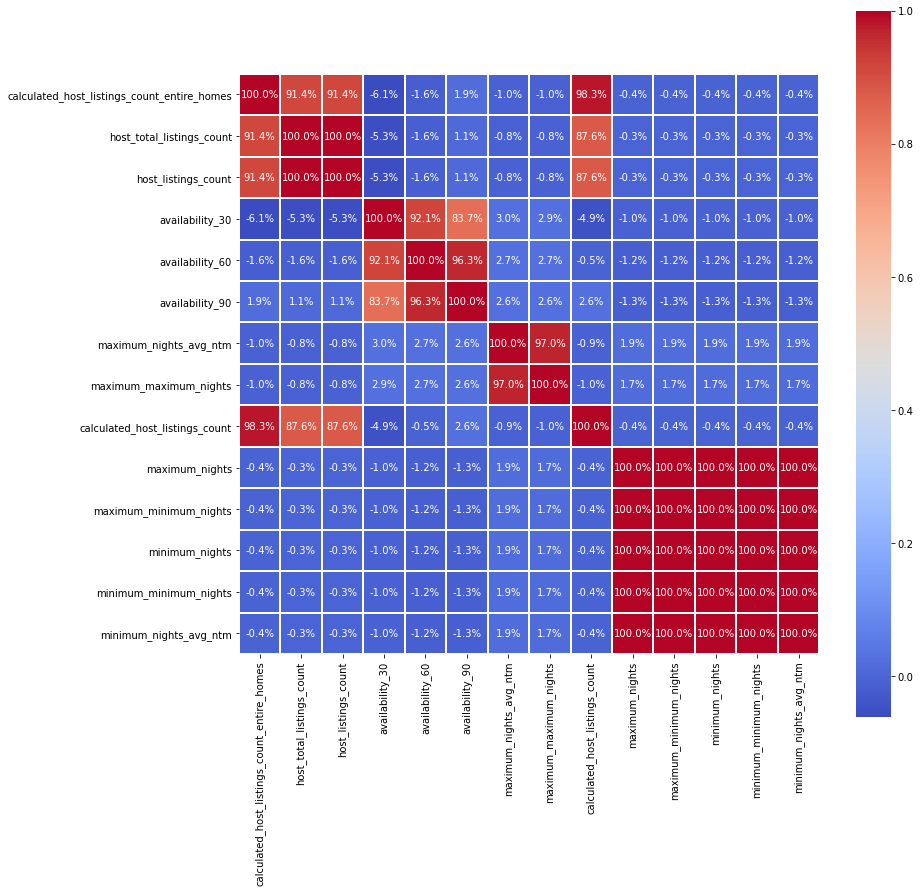

In [12]:
#Create fig
f, ax = plt.subplots(figsize = (13,13))

#Plot corr as heat map
sns.heatmap(data = corr, annot=True,fmt='.1%', cmap = 'coolwarm', ax=ax,
            linewidths=1.0, square=1);

**Drop cols with high collinearity**

In [13]:
#Cols with high collinearity
drop = ['calculated_host_listings_count_entire_homes','maximum_nights_avg_ntm', 'maximum_maximum_nights','minimum_maximum_nights',
        'maximum_minimum_nights','minimum_minimum_nights', 'minimum_nights_avg_ntm', 'host_total_listings_count']

#Drop drop
df.drop(drop, axis=1, inplace = True)

## Clean up object and numeric columns

**Clean up numeric columns**

In [14]:
#Filter cols pertaining to prices and assign col names as a list to money_cols
money_cols = df.filter(regex = 'people|deposit|price|fee$|rate').columns.tolist()

#Remove $, and set type as numeric for money_cols
df[money_cols] = df[money_cols].replace('[$|,|%]','',regex = True).astype('float')

#Check
display(df[money_cols].head(3))

,cleaning_fee,extra_people,host_acceptance_rate,host_response_rate,monthly_price,price,security_deposit,weekly_price
0,100.0,25.0,98.0,90.0,4200.0,170.0,100.0,1120.0
1,100.0,0.0,81.0,100.0,5500.0,235.0,NaN,1600.0
2,50.0,12.0,86.0,100.0,1685.0,65.0,200.0,485.0


**Filter price such that all values are > 0**

In [15]:
#How many rows have price == 0? 
print('Number of rows with price is 0: {}'.format(len(df.loc[df.price == 0])))

#Remove
df = df.loc[~(df.price == 0)]

Number of rows with price is 0: 18


**Clean up object columns**

In [16]:
#Create list of columns to apply cleaning to
objects = df.select_dtypes('object').columns.to_list()

#Check
display(df[objects].head(3))

,access,amenities,bed_type,calendar_updated,cancellation_policy,city,description,host_about,host_location,host_name,host_response_time,host_verifications,house_rules,interaction,license,name,neighborhood_overview,neighbourhood_cleansed,notes,property_type,room_type,space,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",Real Bed,3 weeks ago,moderate,San Francisco,New update: the house next door is under const...,We are a family with 2 boys born in 2009 and 2...,"San Francisco, California, United States",Holly,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,A family of 4 lives upstairs with their dog. N...,STR-0001256,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,Apartment,Entire home/apt,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
1,"Our deck, garden, gourmet kitchen and extensiv...","{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",Real Bed,2 weeks ago,strict_14_with_grace_period,San Francisco,We live in a large Victorian house on a quiet ...,Philip: English transplant to the Bay Area and...,"San Francisco, California, United States",Philip And Tania,within a day,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Please respect the house, the art work, the fu...",NaN,NaN,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,Apartment,Entire home/apt,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,94110
2,NaN,"{TV,Internet,Wifi,Kitchen,""Free street parking...",Real Bed,5 months ago,strict_14_with_grace_period,San Francisco,Nice and good public transportation. 7 minute...,7 minutes walk to UCSF hospital & school campu...,"San Francisco, California, United States",Aaron,within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...","No party, No smoking, not for any kinds of smo...",NaN,NaN,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,Wi-Fi signal in common areas. Large eat in k...,Apartment,Private room,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,94117


In [17]:
#Remove quotes and brackets. Keeping other punctuation
df[objects] = df[objects].apply(lambda x : x.str.replace('[{"}_\'\[\]]',' '))

#Check
display(df[objects].head())

,access,amenities,bed_type,calendar_updated,cancellation_policy,city,description,host_about,host_location,host_name,host_response_time,host_verifications,house_rules,interaction,license,name,neighborhood_overview,neighbourhood_cleansed,notes,property_type,room_type,space,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",Real Bed,3 weeks ago,moderate,San Francisco,New update: the house next door is under const...,We are a family with 2 boys born in 2009 and 2...,"San Francisco, California, United States",Holly,within an hour,"email , phone , facebook , reviews , kba",* No Pets - even visiting guests for a short t...,A family of 4 lives upstairs with their dog. N...,STR-0001256,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,Apartment,Entire home/apt,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
1,"Our deck, garden, gourmet kitchen and extensiv...","Internet,Wifi,Kitchen,Heating, Family/kid fri...",Real Bed,2 weeks ago,strict 14 with grace period,San Francisco,We live in a large Victorian house on a quiet ...,Philip: English transplant to the Bay Area and...,"San Francisco, California, United States",Philip And Tania,within a day,"email , phone , reviews , kba , work ema...","Please respect the house, the art work, the fu...",NaN,NaN,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,Apartment,Entire home/apt,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,94110
2,NaN,"TV,Internet,Wifi,Kitchen, Free street parking...",Real Bed,5 months ago,strict 14 with grace period,San Francisco,Nice and good public transportation. 7 minute...,7 minutes walk to UCSF hospital & school campu...,"San Francisco, California, United States",Aaron,within an hour,"email , phone , reviews , jumio , govern...","No party, No smoking, not for any kinds of smo...",NaN,NaN,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,Wi-Fi signal in common areas. Large eat in k...,Apartment,Private room,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,94117
3,NaN,"TV,Internet,Wifi,Kitchen, Free street parking...",Real Bed,9 months ago,strict 14 with grace period,San Francisco,Nice and good public transportation. 7 minute...,7 minutes walk to UCSF hospital & school campu...,"San Francisco, California, United States",Aaron,within an hour,"email , phone , reviews , jumio , govern...",no pet no smoke no party inside the building,NaN,NaN,Friendly Room Apt. Style -UCSF/USF - San Franc...,NaN,Haight Ashbury,Wi-Fi signal in common areas. Large eat in k...,Apartment,Private room,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",94117
4,Guests have access to everything listed and sh...,"TV,Internet,Wifi,Kitchen, Free street parking...",Real Bed,4 months ago,moderate,San Francisco,Pls email before booking. Interior featured i...,I m an Interior Stylist living in SF. \r\n\r\n...,"San Francisco, California, United States",Rosy,within a few hours,"email , phone , reviews , kba",House Manual and House Rules will be provided ...,NaN,STR-0000264,Historic Alamo Square Victorian,NaN,Western Addition,tax ID on file tax ID on file,Condominium,Entire home/apt,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,NaN,94117


### Missing Data - Resolve by Data Type

#### Datetime64

In [18]:
#Import missing_calculator
from Missing_Stats import missing_calculator

#View missing statistics - datetime64
display(missing_calculator(df, data_type='datetime64'))

,count,percentage
first_review,24396,21.404506
last_review,24396,21.404506
host_since,84,0.073700


Dropping first_review and host_since, does not pertain specifically to price of listings. Additionally dropping all rows without last_review date. These listings were not booked at time of scraping, meaning that price data pertainig to these listings will skeew findings

In [19]:
#Drop first_review and host_since
df.drop(['first_review','host_since'], axis = 1, inplace=True)

#Drop rows with missing last_review
df.dropna(how='any', subset=['last_review'], axis = 0, inplace = True)

#Chech
display(missing_calculator(df, data_type='datetime64'))

,count,percentage


#### Float64 

In [20]:
#View missing statistics - float64
display(missing_calculator(df, data_type='float64'))

,count,percentage
square_feet,87866,98.086626
monthly_price,75455,84.231971
weekly_price,74988,83.710650
host_acceptance_rate,65284,72.877875
security_deposit,15301,17.080822
host_response_rate,10193,11.378656
cleaning_fee,7410,8.271936
bathrooms,136,0.151820
beds,90,0.100469
host_has_profile_pic,77,0.085957


**Drop columns w/ mostly missing values**

Leaving weekly and monthly price since not all hosts have to offer the service and they are sometimes at a special rate compared to the per night rental.

Keeping reviews_per_month as is for now, may fill with mean if needed.

In [21]:
#Dropping square_feet and host_acceptance_rate
df.drop(['square_feet','host_acceptance_rate'], axis = 1, inplace = True)

**Fill remaining cols**

In [22]:
#Subset cols to apply nafill w/ median
cols = ['security_deposit', 'host_response_rate', 'cleaning_fee']

#Fill na w/ median
df[cols]=df[cols].fillna(df.median().iloc[0])

#Subset cols to apply nafill w/ mode
cols = ['beds', 'bathrooms', 'bedrooms']

#Fill na w/mode
df[cols] = df[cols].fillna(df.mode().iloc[0])

#Capture cols for filling
cols = ['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_listings_count' ]

#Ffill, bfill remaining missing floats
df.loc[:,cols]=df.loc[:,cols].ffill().bfill()

#Check
display(missing_calculator(df, data_type='float64'))

,count,percentage
monthly_price,75455,84.231971
weekly_price,74988,83.710650


#### Objects

In [23]:
#View missing statistics - object
display(missing_calculator(df, data_type='object'))

,count,percentage
notes,31380,35.030141
interaction,25336,28.283099
access,24819,27.705961
license,23896,26.675597
house_rules,20871,23.298727
transit,20840,23.264121
host_about,20664,23.067649
neighborhood_overview,19944,22.263898
space,11273,12.584282
host_response_time,10193,11.378656


In [24]:
#Cols containing text data not needed for machine learning
cols =['notes','access', 'interaction', 'transit', 'house_rules', 'neighborhood_overview', 
       'description','name','summary','host_about', 'license','calendar_updated','number_of_reviews_ltm','host_listings_count',
       'space', 'host_location', 'license']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

**Miscellaneous Column cleaning**

In [25]:
#Cols for ffill and bfill
cols = ['host_response_time','cancellation_policy']

#Ffill, bfill objects
df.loc[:,cols]=df.loc[:,cols].ffill().bfill()

df.groupby('is_location_exact')['is_location_exact'].count()

is_location_exact
0    10853
1    78727
Name: is_location_exact, dtype: int64

**City clean-up**

In [26]:
#View unique values in city
print('Unique values in city:\n', df.city.unique())

#Fix Daly City, San Francisco
df.city.replace('[^A-Za-z0-9\s]','San Francisco',regex = True, inplace=True)
df.city.replace('Da.*','Daly City',regex = True, inplace=True)
df.city.replace('(San\sF|Noe|B|Nor).*','San Francisco',regex = True, inplace=True)

#Fill na with San Francisco
df.city.fillna('San Francisco', inplace=True)

#Check
print('Unique values in city:\n', df.city.unique())

Unique values in city:
 ['San Francisco' 'San Francisco, Hayes Valley'
 'Noe Valley - San Francisco' 'South San Francisco' 'San Francisco '
 'Daly City' 'San Franscisco' 'Bernal Heights, San Francisco' nan
 'Daly City ' 'San Fàncisco' 'Nor cal' 'Brisbane' '旧金山' '舊金山']
Unique values in city:
 ['San Francisco' 'South San Francisco' 'Daly City']


**Zipcode clean-up**

In [27]:
#Remove white spaces and CA
df.zipcode.replace('[CA]*\s*','', regex = True, inplace=True)

#Read in libraries to resolve missing values for zipcode using lat/long
from uszipcode import SearchEngine
from uszipcode import Zipcode

#Instantiate SearchEngine
zipsearch = SearchEngine(simple_zipcode=True)

#Write function that finds zip given lat and long data
def get_zipcode(lat, lon):
    result = zipsearch.by_coordinates(lat = lat, lng = lon, returns = 1)
    return result[0].zipcode

#Apply get_zipcode and assign to Zipcode
df.zipcode[df.zipcode.isna()]= df[df.zipcode.isna()][['latitude', 'longitude']].swifter.apply(lambda x: get_zipcode(x.latitude, x.longitude), axis =1)

#Remove rows with missing zip
df = df[~(df.zipcode == '')]

#### Category

In [28]:
#View missing statistics - category
display(missing_calculator(df, data_type='category'))

,count,percentage
review_scores_checkin,778,0.868633
review_scores_location,778,0.868633
review_scores_value,778,0.868633
review_scores_accuracy,763,0.851886
review_scores_cleanliness,758,0.846303
review_scores_communication,744,0.830672
review_scores_rating,676,0.754751


Drop all cols pertaining to reviews other than review_scores_rating. Drop rows with missing review_scores_rating another indication that listing was not rented out. Then D

In [30]:
#Subset cols to drop
cols = df.filter(regex ='review_').columns
cols =cols.drop('review_scores_rating')

#Drop missing cols
df.drop(cols, axis = 1, inplace=True)

#Drop rows with na review_scores_rating
df.dropna(subset=['review_scores_rating'],inplace = True)

#Check
display(missing_calculator(df, data_type='category'))

,count,percentage


**Final Check Missing Values**

In [31]:
display(missing_calculator(df))

,count,percentage
monthly_price,74778,84.124198
weekly_price,74312,83.599955
host_name,77,0.086624


Check Data

In [32]:
#Print final shape of df
print('Shape of cleaned data:', df.shape)
display(df.head())

Shape of cleaned data: (88890, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,0,0,moderate,San Francisco,100.0,25.0,2,1.0,1169,1.0,1.0,Holly,90.0,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2020-03-13,37.76931,-122.43386,1125,1,4200.0,Western Addition,240,170.0,Apartment,0,0,1,97.0,1.84,Entire home/apt,100.0,1120.0,94117
1,5,"Internet,Wifi,Kitchen,Heating, Family/kid fri...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,0,0,strict 14 with grace period,San Francisco,100.0,0.0,2,1.0,8904,1.0,0.0,Philip And Tania,100.0,within a day,"email , phone , reviews , kba , work ema...",5858,0,1,2017-08-06,37.74511,-122.42102,60,30,5500.0,Bernal Heights,111,235.0,Apartment,0,0,1,98.0,0.83,Entire home/apt,2.0,1600.0,94110
2,2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9,0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within an hour,"email , phone , reviews , jumio , govern...",7918,0,1,2020-03-06,37.76555,-122.45213,60,32,1685.0,Haight Ashbury,19,65.0,Apartment,0,0,1,84.0,0.15,Private room,200.0,485.0,94117
3,2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9,0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within an hour,"email , phone , reviews , jumio , govern...",8142,0,1,2018-09-12,37.76555,-122.45213,90,32,1685.0,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.12,Private room,200.0,490.0,94117
4,4,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,1.5,Real Bed,2.0,2.0,2,0,0,moderate,San Francisco,166.0,189.0,2,1.0,24215,1.0,0.0,Rosy,100.0,within a few hours,"email , phone , reviews , kba",8339,0,1,2019-06-28,37.77525,-122.43637,111,5,NaN,Western Addition,28,703.0,Condominium,1,1,1,97.0,0.22,Entire home/apt,0.0,NaN,94117


### Write to csv

In [33]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Write file
df.to_csv(path + '/2020_0520_Listings_Cleaned.csv',index=False)